## Linear  Regression

Try to find the best logistic regression model for a data

Given a handwritten digit from MNIST classify it as 4 or 9 [4 & 9 are the most difficult digits to classify]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd 
import numpy.random as rn

### Data loading

This data is saved in a python pickle format.  
Here is the code to load the data and 
save it to different numpy arrays



In [2]:
# Read the data 
train_df = pd.read_csv("/home/splab-ece/labs/fml/data/mnist/mnist_train.csv")
data = train_df.to_numpy()
# Reading the data and labels
tr_labels = data[:,0]
tr_data   = data[:,1:]

train_df = pd.read_csv("/home/splab-ece/labs/fml/data/mnist/mnist_test.csv")
data = train_df.to_numpy()
# Reading the data and labels
ts_labels = data[:,0]
ts_data   = data[:,1:]

Let us display Random 10 samples and their labels

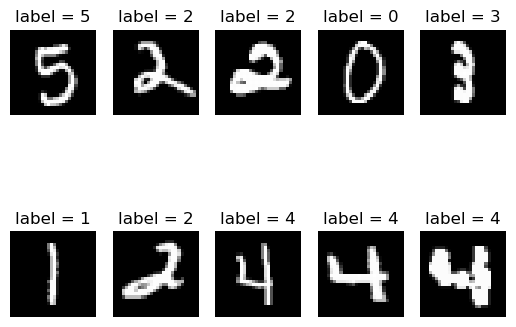

In [6]:
import random 

for i in range(10):
    index = random.randint (0,tr_data.shape[0])
    img = tr_data[index,:].reshape(28,28)
    plt.subplot(2,5,i+1)
    plt.title('label = '+str(tr_labels[index]))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    

### Learn logistic regression
We want to train a logistic regression between classes 4 and 9
we need to do the following
   - separate the training data of classes 4 and 9 
   - make labels class 4 as zero and class 9 as 1 
   - randomly shuffle the training data 
   - do gradient descent learning

In [132]:
''' Here we separate the training data and test data for 
    classes from all other data.    We also change the 
    labels of class 4 as zero and class 9 as 1
'''
# We separate training and labels for class 4 and 9 alone
sub_index    = (tr_labels == 9) | (tr_labels == 4) # finding indexes
tr_datasub  = tr_data[sub_index,:]  # separating training data
tr_labelsub = tr_labels[sub_index] # separating training labels
tr_labelsub[tr_labelsub==4] = 0
tr_labelsub[tr_labelsub==9] = 1

# Repeat the process for test data
sub_index    = (ts_labels == 9) | (ts_labels == 4) # finding indexes
ts_datasub  = ts_data[sub_index,:]  # separating training data
ts_labelsub = ts_labels[sub_index] # separating training labels
ts_labelsub[ts_labelsub==4] = 0
ts_labelsub[ts_labelsub==9] = 1

In [133]:
'''  
We have one more important step before training.
i.e., feature normalization.   These inputs being images, 
they are always between 0 -255.   Here we divide all the 
features with 255, so that they are between 0 and1 
'''
tr_datasub = tr_datasub/255.0 
ts_datasub = ts_datasub/255.0 

#### Learning steps 
Now we do the batch gradient descent. here we need to do the following steps 
  - Initialize the parameters of the logistic regression
  - Find the objective function for training and test data        (For checking the algorithm )
  - choose a learning parameter
  - Now start the learning process
       - Randomly shuffle the training data and labels
       - Go batch by batch : For each batch 
       - Compute the output, Find the gradient 
       - adjust the parameters 
            




In [134]:
'''
Initialize the parameters to zeros
'''
w = np.zeros((tr_datasub.shape[1],1));
b = 0

# Learning parameter 
alpha = 0.0001

print(w.shape)
print(tr_datasub.shape)
print(tr_labelsub.shape)

(784, 1)
(11791, 784)
(11791,)


In [135]:
'''
   Define a function that computes the predictions on an 
   input data set
      - input parameter data Nxd 
      - w, b logistic regression parameters
      - return predictions Nx1
'''

def compute_pred(data,w,b):
    w = w.T
    z = w @ data.T + b
    pred = 1 / (1 + np.exp(-z))
    return pred

'''
   Define a function that computes the objective
   fuction on a data set
      - input parameter data Nxd 
      - input parameter labels Nx1 all zero/one
      - w, b logistic regression parameters
      - return obj function value (scalar)
'''

def compute_obj_function( data, labels, w,b ):
    obj = None # TODO - implement the binary cross entropy
    N=labels.shape[0]
    pred=compute_pred(data,w,b)
    obj=-np.sum(labels*np.log(pred)+(1-labels)*np.log(1-pred))/N
    return obj

'''
   Now define a function that computes the gradients
      - input parameter data Nxd 
      - input parameter labels Nx1 all zero/one
      - w, b logistic regression parameters
      - return gradients a tuple (dw,db) 
        dw is dx1 size db is scalar
'''
def compute_grad(data,labels, w,b):
    # Implement the derivative calculation 
    N=labels.shape[0]
    pred=compute_pred(data,w,b)
    dw=np.sum((pred-labels)@data)/N
    db=np.sum(pred-labels)/N
    return (dw , db)

'''
    Last but not least we need a function to 
    shuffle the data and labels randomly 
      - input parameter data Nxd 
      - input parameter labels Nx1 all zero/one
      - output tuple (data,labels) same dims as input
'''
def random_shuffle(data,labels):
    arr = np.array(range(labels.shape[0]))
    np.random.shuffle(arr) 
    data = data[arr,:]
    labels = labels[arr]
    return(data,labels)
    

obj = compute_obj_function(tr_datasub,tr_labelsub,w,b)
print("Train objective function =", obj)
obj = compute_obj_function(ts_datasub,ts_labelsub,w,b)
print(" Test objective function =", obj)

(dw,db) = compute_grad(tr_datasub,tr_labelsub,w,b)
print('gradients = ' , w.shape, dw.shape,db)

#data = np.ones((4,3))
#labels = np.ones(4);
#(data,labels) = random_shuffle(data,labels)
#print(data,labels)

Train objective function = 0.6931471805599453
 Test objective function = 0.6931471805599454
gradients =  (784, 1) () -0.004537359002629124


#### Batch Gradient Descent

Here we use the functions to do the 
batch gradient descent 

/tmp/ipykernel_12847/587579788.py:28: RuntimeWarning: divide by zero encountered in log
  obj=-np.sum(labels*np.log(pred)+(1-labels)*np.log(1-pred))/N
/tmp/ipykernel_12847/587579788.py:28: RuntimeWarning: invalid value encountered in multiply
  obj=-np.sum(labels*np.log(pred)+(1-labels)*np.log(1-pred))/N


Tr obj = nan Ts obj = nan
Tr obj = nan Ts obj = nan
Tr obj = nan Ts obj = nan
Tr obj = nan Ts obj = nan
Tr obj = nan Ts obj = nan
Tr obj = nan Ts obj = nan
Tr obj = nan Ts obj = nan
Tr obj = nan Ts obj = nan
Tr obj = nan Ts obj = nan
Tr obj = nan Ts obj = nan
Tr obj = nan Ts obj = nan
Tr obj = nan Ts obj = nan
Tr obj = nan Ts obj = nan
Tr obj = nan Ts obj = nan
Tr obj = nan Ts obj = nan
Tr obj = nan Ts obj = nan
Tr obj = nan Ts obj = nan
Tr obj = nan Ts obj = nan
Tr obj = nan Ts obj = nan
Tr obj = nan Ts obj = nan
Tr obj = nan Ts obj = nan
Tr obj = nan Ts obj = nan
Tr obj = nan Ts obj = nan
Tr obj = nan Ts obj = nan
Tr obj = nan Ts obj = nan
Tr obj = nan Ts obj = nan
Tr obj = nan Ts obj = nan
Tr obj = nan Ts obj = nan
Tr obj = nan Ts obj = nan
Tr obj = nan Ts obj = nan
Tr obj = nan Ts obj = nan
Tr obj = nan Ts obj = nan
Tr obj = nan Ts obj = nan
Tr obj = nan Ts obj = nan
Tr obj = nan Ts obj = nan
Tr obj = nan Ts obj = nan
Tr obj = nan Ts obj = nan
Tr obj = nan Ts obj = nan
Tr obj = nan

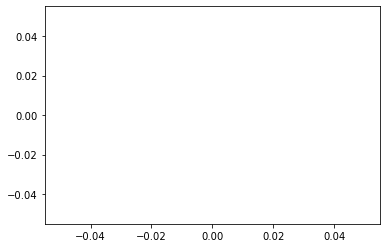

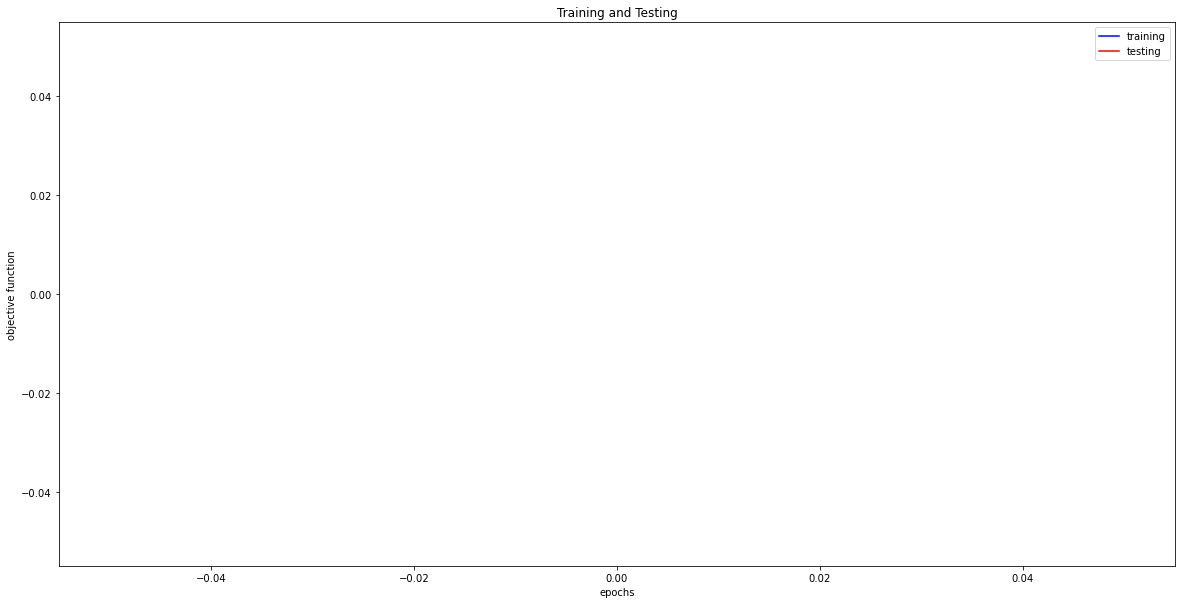

In [137]:
import matplotlib.pyplot as plt

N_Epochs   =  100 # Number of sweeps through the training data 
Batch_size =  25 # Number of training examples in a single batch
N_tr_samples = tr_datasub.shape[0]
N_ts_samples = ts_datasub.shape[0]

N_batches = int(tr_datasub.shape[0]/Batch_size)

tr_obj_fn = np.zeros (N_Epochs)
ts_obj_fn = np.zeros (N_Epochs)


for i in range(N_Epochs):
    # Randomly shuffle data 
    (data,labels)= random_shuffle(tr_datasub,tr_labelsub)
    for j in range (N_batches):
        start = j*Batch_size;
        end = (j+1)*(Batch_size);
        batch_data   = data[start:end,:]
        batch_labels = labels[start:end]
        (dw,db)= compute_grad(batch_data,batch_labels,w,b)
        w = w + alpha * dw
        b = b + alpha * db
    tr_obj_fn[i] = compute_obj_function(tr_datasub,tr_labelsub,w,b)
    ts_obj_fn[i] = compute_obj_function(ts_datasub,ts_labelsub,w,b)
    plt.plot()
    print('Tr obj =',tr_obj_fn[i], 'Ts obj =',ts_obj_fn[i])
    
epochs = range(1,N_Epochs+1)
plt.figure(figsize=(20, 10))
plt.plot(epochs,tr_obj_fn,'b',label='training')
plt.plot(epochs,ts_obj_fn,'r',label='testing')
plt.title('Training and Testing')
plt.xlabel('epochs')
plt.ylabel('objective function')
plt.legend()
plt.show()

# plot the training and testing objective functions 
# vs number of epochs.   See if it is getting trained 
# Also see if the test loss is reducing (generalization)
    
# Find the accuracy on training and test data


# see if there is a overfit or underfit 

# visualize w 